# creating hybrid images

<p dir = "ltr", style = "text-align:left;font-size:18px">
     At first, I load the photos as a numpy array in the code.
<p/>

In [11]:
image1 = imageio.v2.imread('face1.png')
image2 = imageio.v2.imread('face2.png')

image1_np = np.array(image1)
image2_np = np.array(image2)

<p dir = "ltr", style = "text-align:left;font-size:18px">
     Here, we perform a Fourier transform on both images using the fft2 method and then shift them using fftshift so that the zero frequency value is in the middle of the Fourier transform spectrum, this is to preserve the symmetrical shape of the Fourier transform and pass It is necessary from the filter.
<p/>

In [12]:
fft1 = fftpack.fftshift(fftpack.fft2(image1_np))
fft2 = fftpack.fftshift(fftpack.fft2(image2_np))

<p dir = "ltr", style = "text-align:left;font-size:18px">
     Now, to pass the photo through a low-pass filter in the frequency domain, we do this by first creating a grayscale photo in such a way that there is a white circle with a certain radius in the middle and the rest of the photo is black. In the matrix of this photo, the points whose color is black have a value of zero and the points whose color is white have a value of one. As a result, when we multiply this filter by the Fourier transformation of the photos, the points with a value of Fourier transformation of the photo filter and passes itself To create a high-pass filter, we do the opposite of the previous one, the central circle is black and the rest of the photo is white. For the central circle in the filter, the larger its radius, the larger the filter will be and it will pass a larger frequency range.
<p/>

Text(0.5, 1.0, 'high pass filter')

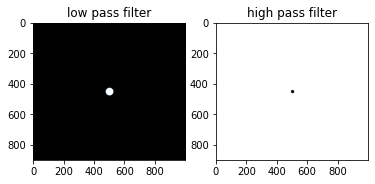

In [13]:
x,y = image1_np.shape[0],image1_np.shape[1]

# low pass filter

# circle size
l_x, l_y= 50, 50

bbox = ((x/2)-(l_x/2), (y/2)-(l_y/2), (x/2)+(l_x/2), (y/2)+(l_y/2))

low_pass = Image.new("L", (image1_np.shape[0], image1_np.shape[1]), color=0)

draw1 = ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)

low_pass_np = np.array(low_pass)

# high pass filter

# circle size
h_x, h_y= 20, 20

bbox = ((x/2)-(h_x/2), (y/2)-(h_y/2), (x/2)+(h_x/2), (y/2)+(h_y/2))
high_pass = Image.new("L", (image1_np.shape[0], image1_np.shape[1]), color=1)

draw2 = ImageDraw.Draw(high_pass)
draw2.ellipse(bbox, fill=0)

high_pass_np = np.array(high_pass)

fig = plt.figure()

fig.add_subplot(1, 2, 1)
plt.imshow(low_pass_np, cmap = plt.cm.bone)
plt.title('low pass filter')

fig.add_subplot(1, 2, 2)
plt.imshow(high_pass_np, cmap = plt.cm.bone)
plt.title('high pass filter')

<p dir = "ltr", style = "text-align:left;font-size:18px">
     Now, here I pass the photos through the filter by performing matrix multiplication of the Fourier transform.
<p/>

In [14]:
filtered1 = np.multiply(fft1,low_pass_np.T)
filtered2 = np.multiply(fft2,high_pass_np.T)


<p dir = "ltr", style = "text-align:left;font-size:18px">
     Now here, at first, the reverse conversion should be taken from the conversions passed through the filter. The process of inverse transformation is to first apply the shift image that we did on the Fourier transformation using the ifftshift method, and then perform the inverse Fourier transformation with the ifft2 method and use np.real to convert the real part of the result. get the At the end, considering that the amount of pixels in black and white photos is 0 to 255, we set the amount of pixels that are outside this range (if it was less than zero, zero and if it was more than 255, 255) We do this using the code snippet ifft = np.maximum(0, np.minimum(ifft, 255)). We have drawn the graph of the photos passed through the low-pass and high-pass filters.
<p/>

Text(0.5, 1.0, 'high passed filter image')

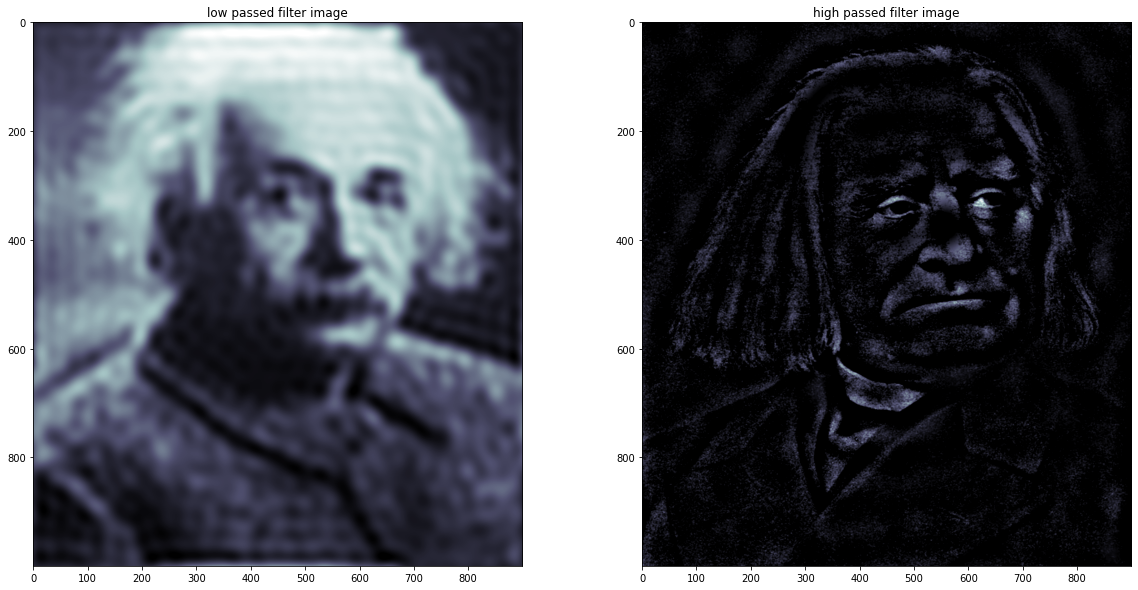

In [15]:
def inverse_fft(fft):
    ifft = np.real(fftpack.ifft2(fftpack.ifftshift(fft)))
    ifft = np.maximum(0, np.minimum(ifft, 255))
    
    return ifft

ifft1 = inverse_fft(filtered1)
ifft2 = inverse_fft(filtered2)

fig = plt.figure(figsize = (2*10, 1*10))

fig.add_subplot(1, 2, 1)
plt.imshow(ifft1.astype(np.uint8), cmap = plt.cm.bone)
plt.title('low passed filter image')

fig.add_subplot(1, 2, 2)
plt.imshow(ifft2.astype(np.uint8), cmap = plt.cm.bone)
plt.title('high passed filter image')

<p dir = "ltr", style = "text-align:left;font-size:18px">
     Finally, we combine the two photos to get a hybrid photo, and we also set the pixel values again in the range of 0 to 255.
<p/>

Text(0.5, 1.0, 'hybrid image')

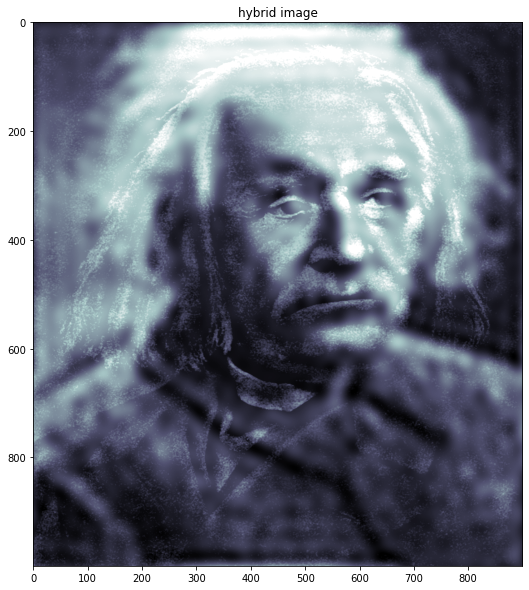

In [16]:
fig = plt.figure(figsize = (1*10, 1*10))
fig.add_subplot(1, 1, 1)
hybrid_img = np.maximum(0, np.minimum(ifft1 + ifft2, 255)).astype(np.uint8)
plt.imshow(hybrid_img, cmap = plt.cm.bone)
plt.title('hybrid image')

<p dir = "ltr", style = "text-align:left;font-size:18px">
    save image
<p/>

In [17]:
imageio.imsave('hybrid_image.png', hybrid_img)